# Detección de Objetos para el desplazamiento autónomo

# Contenido

* [Introducción](#intro)
* [Interface](#interface)
* [Lectura de Sets](#sets)
* [Generacion de Nuevos Sets](#nuevosSets)

## Introduccion <a id='intro'></a>
Este proyecto fue desarrollado con la finalidad de generar un sistema de detección de obtáculos para el apoyo de personas con discapacidad motriz.

El sistema cuenta de 3 etapas, la primera correspondiente a la adquisición de datos de distancia a objetos mediante el uso del sensor __[RP LiDAR A1](https://uelectronics.com/producto/rplidar-a1m8-r6-escaner-laser-360/)__  y un mecanismo de rotación impulsado por servomotor, la segunda etapa es la detección de dichos objetos mediante el uso de algoritmos de Clustering, y finalmente la ultima etapa que corresponde a la retroalimentación al usuario, en este caso una persona con discapacidad visual, por medio de sensores de vibración.


Temas: _Detección de Objetos, Raspberry Pi, LiDAR, Machine Learning, Desplazamiento por discapacidad_

## Interface <a id='interface'></a>

Para correr el sistema se deberá contar con un sensor RPLiDAR modelo A1-A2 por conexión USB2.0 o en su defecto conexión seríal. 
Se deberá correr el archivo GUI/main.py para la apertura de la interfaz.

En la interfaz se podrá generar la reconstrucción del espacio de manera unitario o continua, así como la detección en los objetos mediante los algoritmos k-means y DBSCAN, así como la combinación de ambos.

Dentro de la configuración del sistema se podrá modificar el rango de mapeo del sensor respecto al plano frontal en grados como lo marcan las coordenadas polares, así como la altura del sujeto para tener una referencia del sistema al suelo.

Librerías: _PyQt5, matplotlib, rplidar, numpy, scikit-learn_

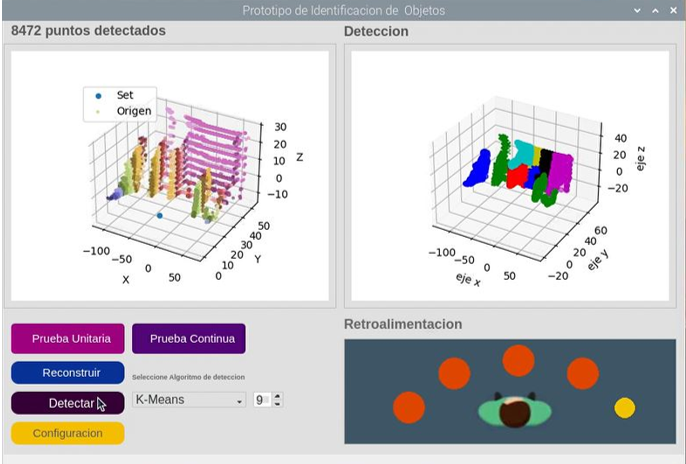

Es importante tomar en cuenta que al hacer la conexión mediante puerto serial o usb, verificar el puerto en el que se realiza la conexión, o en su defecto donde se guarda la conexión, ya que la Raspberry Pi realiza la configuración en automático.

* Conexión medainte USB: _rplidar.RPLidar("/dev/ttyUSB1")_

* Conexión puerto serial _rplidar.RPLidar("COM4")_

La otra cuestión importante a considerar es el puerto para el motor actuador, en el caso de este proyecto se usa por defecto el puerto 12 que cuenta con salida de pulso moduldado, en caso de necesitar otro puerto, dicha salida se puede modificar en la clase _LidarTT/Servo.py_


## Lectura de Sets <a id='sets'></a>
Otros archivos útiles que se podrán encontrar dentro del proyecto es el archivo de ejecución de sets _Plotear_Sets.pyw_ el cual al correrlo permitirá la reconstrucción y seccionamiento de puntos de alguno de los sets de prueba ubicados en la carpeta _/Sets_

De igual forma a continuación se presentala rutina para poder incorporarla a un archivo nuevo de python ya sea mediante txt o csv

### Lectura de set de puntos desde un archivo *.txt

Forma del vector nx3 =(3155, 3)


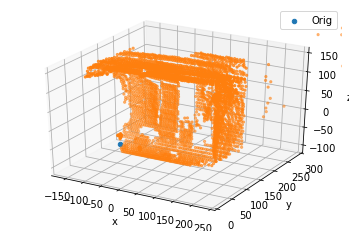

In [23]:
#  Funcion sin ningun argumento (Se abrirá ventana para buscar el archivo)
import LibraryTT.txt2array as conversion
from  numpy import shape
%matplotlib inline
a=conversion.txt2array()
print(f"Forma del vector nx3 ={shape(a)}")
conversion.imprimir3D(a)

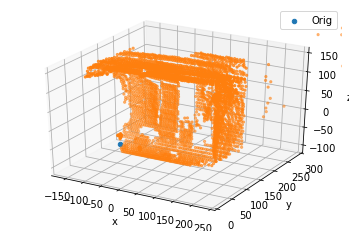

In [24]:
# Forma 2: Función con algun argumneto
%matplotlib inline
a=conversion.txt2array("./Sets/prueba_200911021124.txt")
conversion.imprimir3D(a)

### Lectura de set de puntos desde un archivo *.csv

Forma del vector nx3 =(3144, 3)


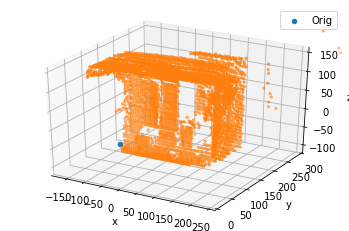

In [28]:
#Forma 1:   Funcion sin ningun argumento (Se abrirá ventana para buscar el archivo)
from  numpy import shape
%matplotlib inline
a=conversion.csv2array()
print(f"Forma del vector nx3 ={shape(a)}")
conversion.imprimir3D(a)

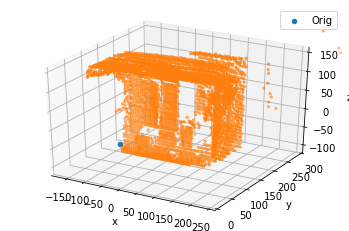

In [34]:
# Forma 2: Función con algun argumneto
%matplotlib inline
a=conversion.csv2array("./Sets_CSV/prueba_200911015330.csv")
conversion.imprimir3D(a)

### Escritura de set de puntos desde un archivo *.txt

In [46]:
import os
a=conversion.txt2array()
conversion.array2txt(a) #Escritura del nuevo vector nx3
file = os.listdir("./Sets")
file.sort()
print("Archivo creado:" +file[-1]) #Imprime el ultimo elemento de la lista

Archivo creado:prueba_200911190321.txt


### Escritura de set de puntos desde un archivo *.csv

In [48]:
import os
a=conversion.txt2array()
conversion.array2csv(a) #Escritura del nuevo vector nx3
file = os.listdir("./Sets_CSV")
file.sort()
print("Archivo creado:" +file[-1]) #Imprime el ultimo elemento de la lista

Archivo creado:prueba_200911190503.csv


### Impresión de nuve de puntos en un pyplot 3D

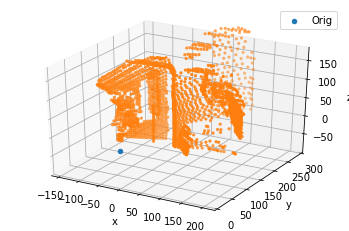

In [52]:
%matplotlib inline
a=conversion.txt2array()
conversion.imprimir3D(a) # Hay que meter un array de forma nx3 corespondiente los sets de puntos LiDAR

## Generación de nuevos sets <a id='nuevosSets'></a>
En dentro de la librería _LibraryTT/Lidar3D.py_ al ejecutar dicho script se puede realizar la reconstrucción de planos para la generación de sets de prueba, en caso de ser requerido para entrenar los datos con otros métodos.

Esta clase empezará a mover el sistema servomotorizado a lo largo el eje  *θ*, una vez se detenga el motor, el archivo se depositará en la misma carpeta del script.

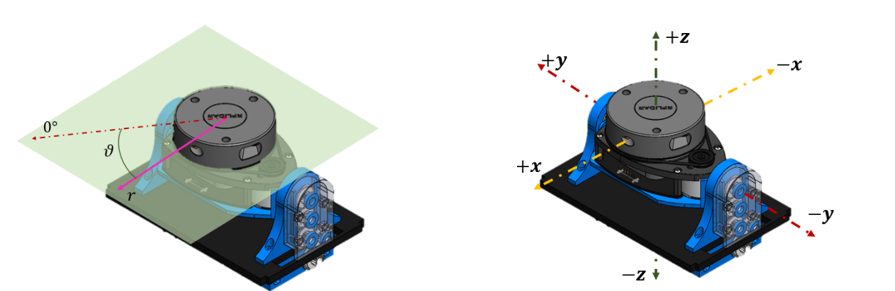